In [36]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [37]:
df=pd.read_csv('data/stud.csv')

In [38]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [39]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [40]:
df.duplicated().sum()

np.int64(0)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [42]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [43]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [44]:
numerical_features=[col for col in df.columns if df[col].dtype!='O']


In [45]:
numerical_features

['math_score', 'reading_score', 'writing_score']

In [46]:
categorical_features=[col for col in df.columns if df[col].dtype == 'O']

In [47]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [48]:
df['TotalScore']=df['math_score']+df['reading_score']+df['writing_score']


In [49]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,TotalScore
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [50]:
df['Average']=df['TotalScore']/3

In [51]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,TotalScore,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [52]:
reading_full=df[df['reading_score'] == 100]['Average'].count()
writing_full=df[df['writing_score'] == 100]['Average'].count()
math_full=df[df['math_score']==100]['Average'].count()

<Axes: xlabel='Average', ylabel='Count'>

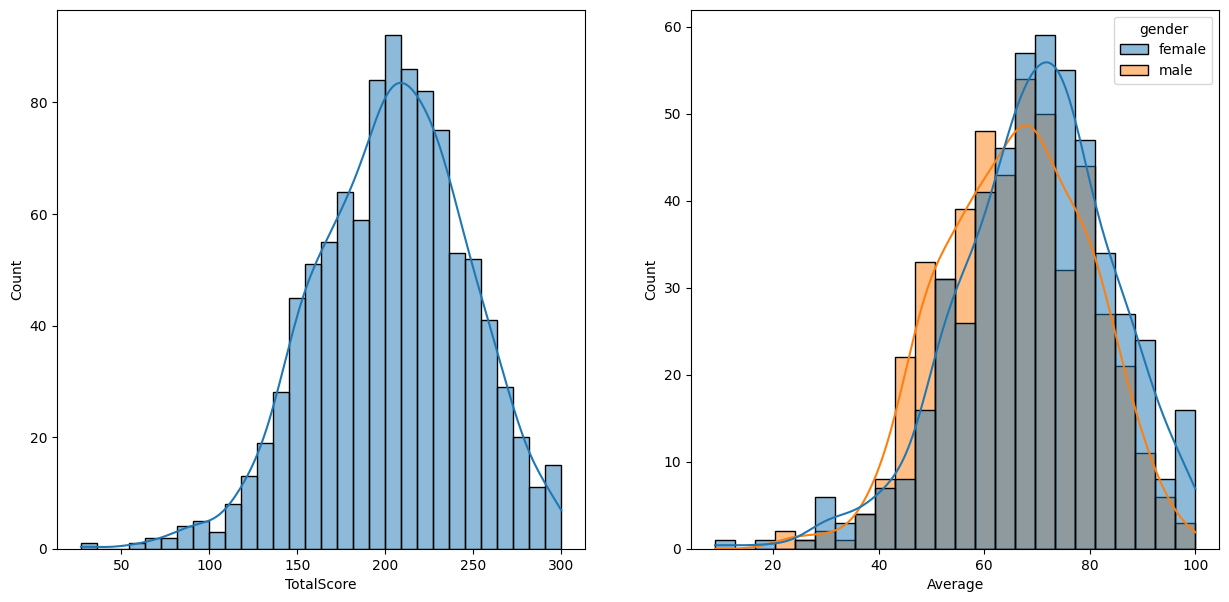

In [66]:
plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='TotalScore',bins=30,kde=True)
plt.subplot(1,2,2)
sns.histplot(data=df,x='Average',kde=True,hue='gender')

<Axes: xlabel='TotalScore', ylabel='Count'>

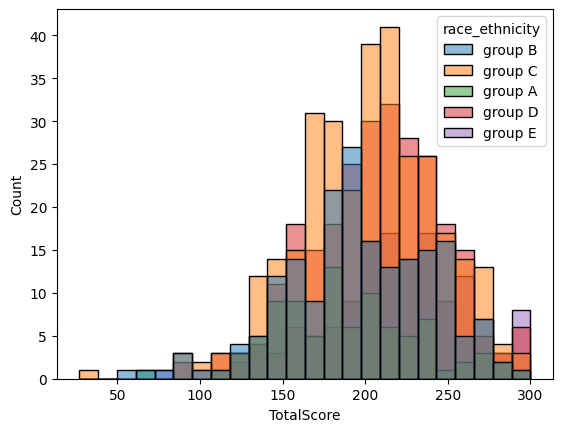

In [69]:
# plt.subplots(2,2,figsize=(30,15))
# plt.subplot(1,2,1)
sns.histplot(data=df,x='TotalScore',hue='race_ethnicity')


In [ ]:
sns.